<a href="https://colab.research.google.com/github/twelvesense/first-repository/blob/master/ExplNode01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다
## 1단계: 데이터 준비하기 및 분석하기

dir  =  ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
keys  =  dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
feature names  =  ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 

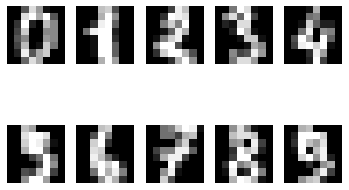

X_train 개수:  1437 , X_test 개수:  360
(1437, 64) (1437,) (360, 64) (360,)


In [5]:
# (1) 필요한 모듈 import하기
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer 
from sklearn.tree import DecisionTreeClassifier     # decision tree
from sklearn.ensemble import RandomForestClassifier      # random forest
from sklearn import svm    # Support Vector Machine
from sklearn.linear_model import SGDClassifier  # Stochastic Gradient Descent Classifier (SGDClassifier)
from sklearn.linear_model import LogisticRegression   # Logistic Regression
def p(desc, x):
   print(str(desc), ' = ', x)

# (2) 데이터 준비
digits = load_digits()
digits_data = digits.data  # feature data 지정하기
digits_label = digits.target  # label data 지정하기

# (3) 데이터 분석
p('dir', dir(digits))      # 속성이나 메서드 출력
p('keys', digits.keys())   # keys 출력
p('feature names', digits.feature_names)     #  각 feature에 대한 설명
p('data shape', digits_data.shape)   # 데이터 배열의 형상정보
p('targer names', digits.target_names)      # 각 target에 대한 설명
p('label shapre', digits_label.shape)   # 라벨 배열의 형상정보
p('DESCRIPTION', digits.DESCR)    # DESCR: 데이터셋의 설명

# (3-1) 데이터 분석 - pandas 활용
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df["label"] = digits.target
print('######################################### 판다스 begin #########################################')
print(digits_df)
print('######################################### 판다스 end #########################################')

# (3-2) 데이터 분석 - matplotlib 활용
# for 0 ~ 9 digits
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits_data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

# (4) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)
print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

## 2단계: 5가지 모델별 학습, 예측, 평가 및 해석하기
### [1/5] decision tree 모델로 예측하고 평가하기

In [3]:
# (5) 모델 학습 및 예측 - [1/5] decision tree
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

# (6) 모델을 평가해 보기
accuracy = accuracy_score(y_test, y_pred)
print('accuracy = ', accuracy)
confusion = confusion_matrix(y_test, y_pred)
print('confusion = ', confusion)
print(classification_report(y_test, y_pred))

accuracy =  0.8555555555555555
confusion =  [[42  0  0  1  0  0  0  0  0  0]
 [ 0 34  3  1  0  1  1  0  0  2]
 [ 0  0 33  2  0  0  1  1  2  1]
 [ 0  1  0 31  0  0  0  0  1  1]
 [ 0  0  1  0 35  0  0  0  1  0]
 [ 0  1  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  2  0 26  0  0  0]
 [ 0  0  0  1  2  1  0 27  0  2]
 [ 0  5  4  1  1  0  3  0 28  1]
 [ 0  1  1  2  2  1  0  0  0 25]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                 

### [1/5] decision tree 모델 예측 결과 해석하기
* accuracy는 0.86임
* confusion관련, 8를 0로 FP한 경우가 특히 많았음
* f1-score 중심으로 평가바람직함 (precision, recall중 월등히 심각한 것 없음)
* f1-score관련, 0를 가장 잘 맞히고, 8를 가장 못 맞힘

### [2/5] random forest 모델로 예측하고 평가하기

In [4]:
# (5) 모델 학습 및 예측 - [2/5] random forest
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# (6) 모델을 평가해 보기
accuracy = accuracy_score(y_test, y_pred)
print('accuracy = ', accuracy)
confusion = confusion_matrix(y_test, y_pred)
print('confusion = ', confusion)
print(classification_report(y_test, y_pred))

accuracy =  0.9638888888888889
confusion =  [[42  0  0  0  1  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  1]
 [ 0  0  0  0  1  0 27  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  1]
 [ 0  3  0  0  1  1  0  2 36  0]
 [ 0  0  0  0  0  2  0  0  0 30]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                 

### [2/5] random forest 모델 예측 결과 해석하기
* accuracy는 0.96임
* confusion관련, 8를 0으로 FP한 경우가 특히 많았음
* f1-score 중심으로 평가바람직함 (precision, recall중 월등히 심각한 것 없음)
* f1-score관련, 대체로 잘 맞히고, 8를 가장 못 맞으

### [3/5] Support Vector Machine 모델로 예측하고 평가하기

In [6]:
# (5) 모델 학습 및 예측 - [3/5] Support Vector Machine
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# (6) 모델을 평가해 보기
accuracy = accuracy_score(y_test, y_pred)
print('accuracy = ', accuracy)
confusion = confusion_matrix(y_test, y_pred)
print('confusion = ', confusion)
print(classification_report(y_test, y_pred))

accuracy =  0.9888888888888889
confusion =  [[43  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0]
 [ 0  2  0  0  0  1  0  0 40  0]
 [ 0  0  0  0  0  1  0  0  0 31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                 

### [3/5] Support Vector Machine 모델 예측 결과 해석하기
* accuracy는 0.99임
* confusion관련, 8를 0으로 FP한 경우가 특히 많았음
* f1-score 중심으로 평가바람직함 (precision, recall중 월등히 심각한 것 없음)
* f1-score관련, 대체로 잘 맞히고, 8를 가장 못 맞힘

### [4/5] Stochastic Gradient Descent Classifier (SGDClassifier) 모델로 예측하고 평가하기

In [7]:
# (5) 모델 학습 및 예측 - [4/5] Stochastic Gradient Descent Classifier (SGDClassifier)
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

# (6) 모델을 평가해 보기
accuracy = accuracy_score(y_test, y_pred)
print('accuracy = ', accuracy)
confusion = confusion_matrix(y_test, y_pred)
print('confusion = ', confusion)
print(classification_report(y_test, y_pred))

accuracy =  0.9361111111111111
confusion =  [[43  0  0  0  0  0  0  0  0  0]
 [ 0 35  1  2  0  2  0  0  1  1]
 [ 0  0 39  1  0  0  0  0  0  0]
 [ 0  0  0 31  0  1  0  1  0  1]
 [ 0  0  0  0 36  0  1  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  1]
 [ 1  1  0  0  0  0 26  0  0  0]
 [ 0  0  0  0  1  0  0 32  0  0]
 [ 0  3  1  0  1  1  0  0 37  0]
 [ 0  0  0  0  0  1  0  0  0 31]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.90      0.83      0.86        42
           2       0.95      0.97      0.96        40
           3       0.91      0.91      0.91        34
           4       0.95      0.97      0.96        37
           5       0.84      0.96      0.90        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.97      0.86      0.91        43
           9       0.91      0.97      0.94        32

    accuracy                 

### [4/5] Stochastic Gradient Descent Classifier (SGDClassifier) 모델 예측 결과 해석하기
* accuracy는 0.94임
* confusion관련, 8를 0으로 FP한 경우가 특히 많았음
* f1-score 중심으로 평가바람직함 (precision, recall중 월등히 심각한 것 없음)
* f1-score관련, 0를 가장 잘 맞히고, 8를 가장 못 맞힘

### [5/5] Logistic Regression 모델로 예측하고 평가하기

In [9]:
# (5) 모델 학습 및 예측 -[5/5] Logistic Regression
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

# (6) 모델을 평가해 보기
accuracy = accuracy_score(y_test, y_pred)
print('accuracy = ', accuracy)
confusion = confusion_matrix(y_test, y_pred)
print('confusion = ', confusion)
print(classification_report(y_test, y_pred))

accuracy =  0.9444444444444444
confusion =  [[43  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  2  0  1  0  0  0  1]
 [ 0  0 39  1  0  0  0  0  0  0]
 [ 0  0  0 32  0  0  0  1  1  0]
 [ 0  0  0  0 36  0  1  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  1  0  0  0  0 26  0  1  0]
 [ 0  0  0  0  1  0  0 32  0  0]
 [ 0  3  1  0  1  0  0  0 38  0]
 [ 0  0  0  2  0  1  0  0  1 28]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.90      0.90      0.90        42
           2       0.97      0.97      0.97        40
           3       0.86      0.94      0.90        34
           4       0.95      0.97      0.96        37
           5       0.93      1.00      0.97        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.93      0.88      0.90        43
           9       0.97      0.88      0.92        32

    accuracy                 

### [5/5] Logistic Regression 모델 예측 결과 해석하기
* accuracy는 0.94임
* confusion관련, 8를 0으로 FP한 경우가 특히 많았음
* f1-score 중심으로 평가바람직함 (precision, recall중 월등히 심각한 것 없음)
* f1-score관련, 0를 가장 잘 맞히고, 8를 가장 못 맞힘

## 3단계: 마무리 (모델들의 종합 평가)
* 모든 모델이 비슷한 경함성을 보였다. 즉, 대체로 8를 0으로 오인식한다.
* 그래서, 8에 대한 오인식율이 가장 높다.
* 그 중에서 f1-score기준으로 가장 높은 건, Support Vector Machine 모델이었다.

# 프로젝트 (2) load_wine : 와인을 분류해 봅시다

## 1단계: 데이터 준비하기 및 분석하기

dir  =  ['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']
keys  =  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
feature names  =  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
data shape  =  (178, 13)
targer names  =  ['class_0' 'class_1' 'class_2']
label shapre  =  (178,)
DESCRIPTION  =  .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- 

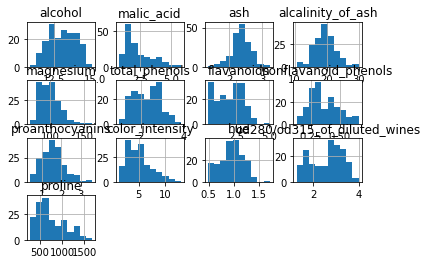

In [14]:
# (2) 데이터 준비
wine = load_wine()
wine_data = wine.data  # feature data 지정하기
wine_label = wine.target  # label data 지정하기

# (3) 데이터 분석
p('dir', dir(wine))      # 속성이나 메서드 출력
p('keys', wine.keys())   # keys 출력
p('feature names', wine.feature_names)     #  각 feature에 대한 설명
p('data shape', wine_data.shape)   # 데이터 배열의 형상정보
p('targer names', wine.target_names)      # 각 target에 대한 설명
p('label shapre', wine_label.shape)   # 라벨 배열의 형상정보
p('DESCRIPTION', wine.DESCR)    # DESCR: 데이터셋의 설명

# (3-1) 데이터 분석 - pandas 활용
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df["label"] = wine.target
print('######################################### 판다스 begin #########################################')
print(wine_df)
print('######################################### 판다스 end #########################################')

# (3-2) 데이터 분석 - matplotlib 활용
#Histogramas
wine_df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']].hist()

# (4) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=7)
print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

## 2단계: 5가지 모델별 학습, 예측, 평가 및 해석하기

### [1/5] decision tree 모델로 예측하고 평가하기


In [15]:
# (5) 모델 학습 및 예측 - [1/5] decision tree
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

# (6) 모델을 평가해 보기
accuracy = accuracy_score(y_test, y_pred)
print('accuracy = ', accuracy)
confusion = confusion_matrix(y_test, y_pred)
print('confusion = ', confusion)
print(classification_report(y_test, y_pred))

accuracy =  0.9444444444444444
confusion =  [[ 7  0  0]
 [ 0 17  0]
 [ 0  2 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



### [1/5] decision tree 모델 예측 결과 해석하기
* accuracy는 0.944임
* confusion관련, class3를 class2로 FP한 경우가 특히 많았음
* class1를 positive라 할때, class3을 class1로 하면 심각하므로, precision중심으로 평가바람직함
* precision관련, class2를 가장 못 맞히고, macro avg는 0.96임

### [2/5] random forest 모델로 예측하고 평가하기

In [16]:
# (5) 모델 학습 및 예측 - [2/5] random forest
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# (6) 모델을 평가해 보기
accuracy = accuracy_score(y_test, y_pred)
print('accuracy = ', accuracy)
confusion = confusion_matrix(y_test, y_pred)
print('confusion = ', confusion)
print(classification_report(y_test, y_pred))

accuracy =  1.0
confusion =  [[ 7  0  0]
 [ 0 17  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### [2/5] random forest 모델 예측 결과 해석하기
* accuracy는 1.0임
* confusion관련, 오인식이 없음
* class1를 positive라 할때, class3을 class1로 하면 심각하므로, precision중심으로 평가바람직함
* precision관련, macro avg는 1.0임

### [3/5] Support Vector Machine 모델로 예측하고 평가하기

In [17]:
# (5) 모델 학습 및 예측 - [3/5] Support Vector Machine
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# (6) 모델을 평가해 보기
accuracy = accuracy_score(y_test, y_pred)
print('accuracy = ', accuracy)
confusion = confusion_matrix(y_test, y_pred)
print('confusion = ', confusion)
print(classification_report(y_test, y_pred))


accuracy =  0.6111111111111112
confusion =  [[ 6  0  1]
 [ 1 15  1]
 [ 0 11  1]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



### [3/5] Support Vector Machine 모델 예측 결과 해석하기
* accuracy는 0.611임
* confusion관련, class3를 class2로 FP한 경우가 특히 많았음
* class1를 positive라 할때, class3을 class1로 하면 심각하므로, precision중심으로 평가바람직함
* precision관련, class2를 가장 못 맞히고, macro avg는 0.59임


### [4/5] Stochastic Gradient Descent Classifier (SGDClassifier) 모델로 예측하고 평가하기

In [18]:
# (5) 모델 학습 및 예측 - [4/5] Stochastic Gradient Descent Classifier (SGDClassifier)
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

# (5) 모델 학습 및 예측 -[5/5] Logistic Regression
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

# (6) 모델을 평가해 보기
accuracy = accuracy_score(y_test, y_pred)
print('accuracy = ', accuracy)
confusion = confusion_matrix(y_test, y_pred)
print('confusion = ', confusion)
print(classification_report(y_test, y_pred))


accuracy =  0.9722222222222222
confusion =  [[ 7  0  0]
 [ 1 16  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



### [4/5] Stochastic Gradient Descent Classifier (SGDClassifier) 모델 예측 결과 해석하기
* accuracy는 0.97임
* confusion관련, class2를 class1로 FP한 경우가 특히 많았음
* class1를 positive라 할때, class3을 class1로 하면 심각하므로, precision중심으로 평가바람직함
* precision관련, class1를 가장 못 맞히고, macro avg는 0.96임

### [5/5] Logistic Regression 모델로 예측하고 평가하기

In [19]:
# (5) 모델 학습 및 예측 -[5/5] Logistic Regression
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

# (6) 모델을 평가해 보기
accuracy = accuracy_score(y_test, y_pred)
print('accuracy = ', accuracy)
confusion = confusion_matrix(y_test, y_pred)
print('confusion = ', confusion)
print(classification_report(y_test, y_pred))


accuracy =  0.9722222222222222
confusion =  [[ 7  0  0]
 [ 1 16  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



## 3단계: 마무리 (모델들의 종합 평가)
* 모든 모델이 비슷한 경함성을 보였다. 즉, 대체로 class2를 class1로 오인식한다.
* 그래서, class1에 대한 precision이 가장 높다.
* 그 중에서 precision기준으로 가장 높은 건, random forest 모델이었다.

# 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다

## 1단계: 데이터 준비하기 및 분석하기

dir  =  ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
keys  =  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
feature names  =  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
data shape  =  (569, 30)
targer names  =  ['malignant' 'benign']
label shapre  =  (569,)
DESCRIPTION  =  .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
---------------------------

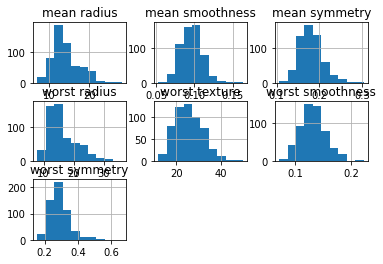

In [29]:
# (2) 데이터 준비
breast_cancer = load_breast_cancer()
breast_cancer_data = breast_cancer.data  # feature data 지정하기
breast_cancer_label = breast_cancer.target  # label data 지정하기

# (3) 데이터 분석
p('dir', dir(breast_cancer))      # 속성이나 메서드 출력
p('keys', breast_cancer.keys())   # keys 출력
p('feature names', breast_cancer.feature_names)     #  각 feature에 대한 설명
p('data shape', breast_cancer_data.shape)   # 데이터 배열의 형상정보
p('targer names', breast_cancer.target_names)      # 각 target에 대한 설명
p('label shapre', breast_cancer_label.shape)   # 라벨 배열의 형상정보
p('DESCRIPTION', breast_cancer.DESCR)    # DESCR: 데이터셋의 설명

# (3-1) 데이터 분석 - pandas 활용
breast_cancer_df = pd.DataFrame(data=breast_cancer_data, columns=breast_cancer.feature_names)
breast_cancer_df["label"] = breast_cancer.target
print('######################################### 판다스 begin #########################################')
print(breast_cancer_df)
print('######################################### 판다스 end #########################################')

# (3-2) 데이터 분석 - matplotlib 활용
#Histogramas
breast_cancer_df[['mean radius', 'mean smoothness', 'mean symmetry', 'worst radius', 'worst texture', 'worst smoothness', 'worst symmetry']].hist()


# (4) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=7)
print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

## 2단계: 5가지 모델별 학습, 예측, 평가 및 해석하기

### [1/5] decision tree 모델로 예측하고 평가하기


In [30]:
# (5) 모델 학습 및 예측 - [1/5] decision tree
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

# (6) 모델을 평가해 보기
accuracy = accuracy_score(y_test, y_pred)
print('accuracy = ', accuracy)
confusion = confusion_matrix(y_test, y_pred)
print('confusion = ', confusion)
print(classification_report(y_test, y_pred))

accuracy =  0.9122807017543859
confusion =  [[33  7]
 [ 3 71]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



### [1/5] decision tree 모델 예측 결과 해석하기
* accuracy는 0.912임
* confusion관련, 음성을 양성으로 FP한 경우가 특히 많았음
* 1을 positive라 할때, 양성이 음성으로 평가되면 심각하므로, recall중심으로 평가바람직함
* recall관련, macro avg는 0.91임

### [2/5] random forest 모델로 예측하고 평가하기


In [31]:
# (5) 모델 학습 및 예측 - [2/5] random forest
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# (6) 모델을 평가해 보기
accuracy = accuracy_score(y_test, y_pred)
print('accuracy = ', accuracy)
confusion = confusion_matrix(y_test, y_pred)
print('confusion = ', confusion)
print(classification_report(y_test, y_pred))


accuracy =  1.0
confusion =  [[40  0]
 [ 0 74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



### [2/5] random forest 모델 예측 결과 해석하기
* accuracy는 1.0임
* confusion관련, 음성을 양성으로 FP한 경우가 특히 많았음
* 1을 positive라 할때, 양성이 음성으로 평가되면 심각하므로, recall중심으로 평가바람직함
* recall관련, macro avg는 1.0임

### [3/5] Support Vector Machine 모델로 예측하고 평가하기


In [32]:
# (5) 모델 학습 및 예측 - [3/5] Support Vector Machine
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# (6) 모델을 평가해 보기
accuracy = accuracy_score(y_test, y_pred)
print('accuracy = ', accuracy)
confusion = confusion_matrix(y_test, y_pred)
print('confusion = ', confusion)
print(classification_report(y_test, y_pred))


accuracy =  0.9035087719298246
confusion =  [[29 11]
 [ 0 74]]
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



### [3/5] Support Vector Machine 모델 예측 결과 해석하기
* accuracy는 0.903임
* confusion관련, 음성을 양성으로 FP한 경우가 특히 많았음
* 1을 positive라 할때, 양성이 음성으로 평가되면 심각하므로, recall중심으로 평가바람직함
* recall관련, macro avg는 0.94임

### [4/5] Stochastic Gradient Descent Classifier (SGDClassifier) 모델로 예측하고 평가하기


In [33]:
# (5) 모델 학습 및 예측 - [4/5] Stochastic Gradient Descent Classifier (SGDClassifier)
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

# (6) 모델을 평가해 보기
accuracy = accuracy_score(y_test, y_pred)
print('accuracy = ', accuracy)
confusion = confusion_matrix(y_test, y_pred)
print('confusion = ', confusion)
print(classification_report(y_test, y_pred))


accuracy =  0.8421052631578947
confusion =  [[22 18]
 [ 0 74]]
              precision    recall  f1-score   support

           0       1.00      0.55      0.71        40
           1       0.80      1.00      0.89        74

    accuracy                           0.84       114
   macro avg       0.90      0.78      0.80       114
weighted avg       0.87      0.84      0.83       114



### [4/5] Stochastic Gradient Descent Classifier (SGDClassifier) 모델 예측 결과 해석하기
* accuracy는 0.842임
* confusion관련, 음성을 양성으로 FP한 경우가 특히 많았음
* 1을 positive라 할때, 양성이 음성으로 평가되면 심각하므로, recall중심으로 평가바람직함
* recall관련, macro avg는 0.90임

### [5/5] Logistic Regression 모델로 예측하고 평가하기

In [34]:
# (5) 모델 학습 및 예측 -[5/5] Logistic Regression
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

# (6) 모델을 평가해 보기
accuracy = accuracy_score(y_test, y_pred)
print('accuracy = ', accuracy)
confusion = confusion_matrix(y_test, y_pred)
print('confusion = ', confusion)
print(classification_report(y_test, y_pred))


accuracy =  0.9473684210526315
confusion =  [[34  6]
 [ 0 74]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



### [5/5] Logistic Regression 모델 예측 결과 해석하기
* accuracy는 0.947임
* confusion관련, 음성을 양성으로 FP한 경우가 특히 많았음
* 1을 positive라 할때, 양성이 음성으로 평가되면 심각하므로, recall중심으로 평가바람직함
* recall관련, macro avg는 0.96임

## 3단계: 마무리 (모델들의 종합 평가)
* 모든 모델이 비슷한 경함성을 보였다. 즉, 대체로 음성을 양성으로 오인식한다.
* 모델들 중에서 precision기준으로 가장 높은 건, random forest 모델이었다.